# <span style='color:#15BFF0'>STAT4060J Project</span><img src="https://www.ji.sjtu.edu.cn/wp-content/uploads/2020/04/footer-logo.png" alt="Drawing" style="float: right; width: 150px;"/>
Group member: ERIK ALEXANDER SIMERT NORDGREN, NAYRI YANN ROJAS MEDINA, CHRISTOPHE YE

In [34]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time
np.random.seed(42)

dataset from https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv

In [2]:
data=pd.read_csv("Data.csv")
data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
data=pd.get_dummies(data, columns=["Gender","Customer Type","Type of Travel","Class",'satisfaction'], drop_first=True)
data.replace({True:1,False:0},inplace=True)
data = data.drop(columns=["id","Unnamed: 0"])
data=data.dropna()
data.head()

  data.replace({True:1,False:0},inplace=True)


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,1,0,1,0,1,0
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,1,1,0,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,0,0,0,0,1


In [5]:
X = data.iloc[:, :-1].to_numpy() 
y = data.iloc[:, -1].to_numpy().reshape(-1, 1) 

In [6]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,train_size=0.8,random_state=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)

In [7]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

def logistic(x, y, num_iteration=250, learning_rate=1e-5, tol=1e-8):
    r, c = x.shape
    p = c + 1
    X = np.hstack((np.ones((r, 1)), x))
    beta = 2 * np.random.randn(p, 1) - 1
    accuracies = []
    times=[0]
    convergence_iter = None 
    for i in range(num_iteration):
        start=time()
        pr = sigmoid(X.dot(beta))
        y_pred = (pr >= 0.5).astype(int)
        accuracy = accuracy_score(y, y_pred)
        accuracies.append(accuracy)
        beta = beta + learning_rate * X.T.dot(y - pr)
        times.append(times[-1]+time()-start)
        if i > 0:
            loss_diff = np.abs(accuracies[-1] - accuracies[-2])
            if loss_diff < tol and convergence_iter is None:
                convergence_iter = i
    return beta, accuracies, times[1:], convergence_iter

def predict(x, beta, threshold=0.5):
    X = np.hstack((np.ones((x.shape[0], 1)), x))
    probabilities = sigmoid(X.dot(beta))
    return (probabilities >= threshold).astype(int)

In [8]:
def logistic_NAG(x, y, num_iteration=250, learning_rate=1e-5, momentum=0.9, tol=1e-8):
    r, c = x.shape
    p = c + 1
    X = np.hstack((np.ones((r, 1)), x))
    beta = 2 * np.random.randn(p, 1) - 1
    v = np.zeros_like(beta)
    accuracies = []
    times=[0]
    convergence_iter = None
    for i in range(num_iteration):
        start=time()
        lbeta = beta + momentum * v
        pr = sigmoid(X.dot(lbeta))
        y_pred = (pr >= 0.5).astype(int)
        accuracy = accuracy_score(y, y_pred)
        accuracies.append(accuracy)
        gradient = X.T.dot(y - pr)
        v = momentum * v + learning_rate * gradient
        beta += v
        times.append(times[-1]+time()-start)
        if i > 0:
            loss_diff = np.abs(accuracies[-1] - accuracies[-2])
            if loss_diff < tol and convergence_iter is None:
                convergence_iter = i
    return beta, accuracies, times[1:], convergence_iter

In [9]:
def logistic_Polyak(X, y, num_iteration=1000, learning_rate=1e-5, momentum=0.9, tol=1e-8):
    r, c = X.shape
    p = c + 1
    X = np.hstack((np.ones((r, 1)), X))
    beta = 2 * np.random.randn(p, 1) - 1
    v = np.zeros_like(beta)
    accuracies = []
    times=[0]
    convergence_iter = None
    for i in range(num_iteration):
        start=time()
        pr = sigmoid(X.dot(beta))
        y_pred = (pr >= 0.5).astype(int)
        accuracy = accuracy_score(y, y_pred)
        accuracies.append(accuracy)
        gradient = X.T.dot(y - pr)
        v = momentum * v + learning_rate * gradient
        beta += v
        times.append(times[-1]+time()-start)
        if i > 10:
            loss_diff = np.abs(accuracies[-1] - accuracies[-2])
            if loss_diff < tol and convergence_iter is None:
                convergence_iter = i
    return beta,accuracies, times[1:], convergence_iter

In [38]:
def logistic_Adam(x, y, num_iteration=1000, learning_rate=0.01, beta1=0.8, beta2=0.999, epsilon=1e-8, tol=1e-8):
    r, c = x.shape
    p = c + 1
    X = np.hstack((np.ones((r,1)), x))
    beta = 2*np.random.randn(p, 1)-1
    # Adam optimization variables
    m = np.zeros((p, 1))
    v = np.zeros((p, 1))
    t = 0
    accuracies = []
    times=[0]
    convergence_iter = None
    for i in range(num_iteration):
        start=time()
        t += 1
        pr = sigmoid(X.dot(beta))
        y_pred = (pr >= 0.5).astype(int)
        accuracy = accuracy_score(y, y_pred)
        accuracies.append(accuracy)
        gradient = X.T.dot(y - pr)
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        beta += learning_rate * m_hat/(np.sqrt(v_hat) + epsilon)
        times.append(times[-1]+time()-start)
        if i > 0:
            loss_diff = np.abs(accuracies[-1] - accuracies[-2])
            if loss_diff < tol and convergence_iter is None:
                convergence_iter = i
    return beta,accuracies, times[1:] ,convergence_iter

In [11]:
def logistic_Adagrad(x, y, num_iteration=1000, learning_rate=0.01, epsilon=1e-8, tol=1e-8):
    r, c = x.shape
    p = c + 1
    X = np.hstack((np.ones((r, 1)), x))
    beta = 2 * np.random.randn(p, 1) - 1 
    # Adagrad optimization variables
    G = np.zeros((p, 1))
    accuracies = []
    times=[0]
    convergence_iter = None
    for i in range(num_iteration):
        start=time()
        pr = sigmoid(X.dot(beta))
        y_pred = (pr >= 0.5).astype(int)
        accuracy = accuracy_score(y, y_pred)
        accuracies.append(accuracy)
        gradient = X.T.dot(y - pr)  
        G += gradient ** 2 
        beta += learning_rate * gradient / (np.sqrt(G) + epsilon)
        times.append(times[-1]+time()-start)
        if i > 0:
            loss_diff = np.abs(accuracies[-1] - accuracies[-2])
            if loss_diff < tol and convergence_iter is None:
                convergence_iter = i
    return beta, accuracies, times[1:], convergence_iter

In [47]:
num_iterations = 100
momentum = 0.8
tolconst = 1e-4

In [48]:
beta, accuracies, times, convergence = logistic(X_train_scaled, Ytrain, num_iteration=num_iterations, learning_rate=1e-5,tol=tolconst)

beta_with_nag, accuracies_with_nag, times_nag, convergence_nag = logistic_NAG(X_train_scaled, Ytrain, num_iteration=num_iterations, learning_rate=1e-5, momentum=momentum,tol=tolconst)

beta_with_pol, accuracies_with_pol, times_pol, convergence_pol = logistic_Polyak(X_train_scaled, Ytrain, num_iteration=num_iterations, learning_rate=1e-5, momentum=momentum,tol=tolconst)

beta_with_adam, accuracies_with_adam, times_adam, convergence_adam = logistic_Adam(X_train_scaled, Ytrain, num_iteration=num_iterations,learning_rate=0.7,tol=tolconst)

beta_with_ada, accuracies_with_ada, times_ada, convergence_ada = logistic_Adagrad(X_train_scaled, Ytrain, num_iteration=num_iterations,learning_rate=1.1,tol=tolconst)

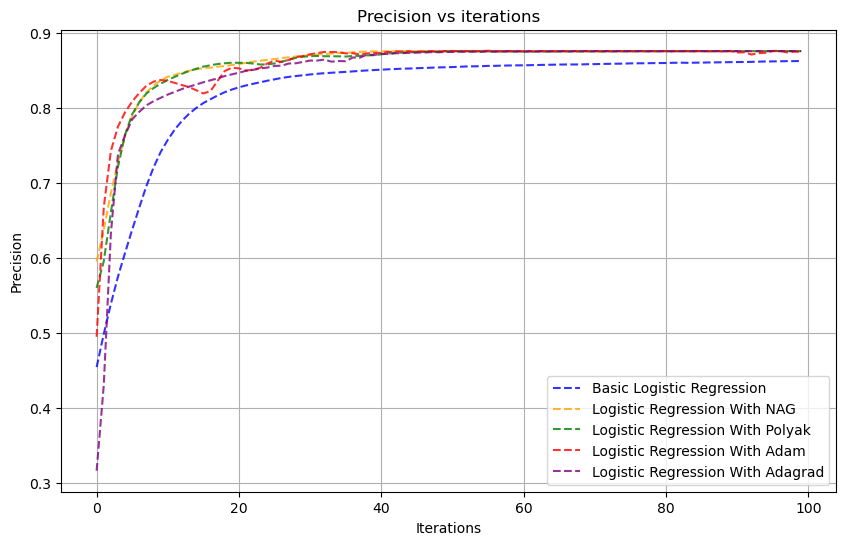

In [49]:
iterations=range(num_iterations)
plt.figure(figsize=(10, 6))
plt.plot(iterations, accuracies, label='Basic Logistic Regression', linestyle='--', color='blue', alpha=0.8)
plt.plot(iterations, accuracies_with_nag, label='Logistic Regression With NAG', linestyle='--', color='orange', alpha=0.8)
plt.plot(iterations, accuracies_with_pol, label='Logistic Regression With Polyak', linestyle='--', color='green', alpha=0.8)
plt.plot(iterations, accuracies_with_adam, label='Logistic Regression With Adam', linestyle='--', color='red', alpha=0.8)
plt.plot(iterations, accuracies_with_ada, label='Logistic Regression With Adagrad', linestyle='--', color='purple', alpha=0.8)
plt.xlabel('Iterations')
plt.ylabel('Precision')
plt.title('Precision vs iterations')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
print(convergence,convergence_nag,convergence_pol,convergence_adam,convergence_ada)

result=pd.DataFrame([["Basic Logistic Regression",convergence,times[convergence],times[-1]/num_iterations*1000,accuracies[convergence]],
                   ["Logistic Regression With NAG",convergence_nag,times_nag[convergence_nag],times_nag[-1]/num_iterations*1000,accuracies_with_nag[convergence_nag]],
                   ["Logistic Regression, With Poliak",convergence_pol,times_pol[convergence_pol],times_pol[-1]/num_iterations*1000,accuracies_with_pol[convergence_pol]],
                   ["Logistic Regression With Adam",convergence_adam,times_adam[convergence_adam],times_adam[-1]/num_iterations*1000,accuracies_with_adam[convergence_adam]],
                   ["Logistic Regression With Adagrad",convergence_ada,times_ada[convergence_ada],times_ada[-1]/num_iterations*1000,accuracies_with_ada[convergence_ada]]]
                   , columns=["Method", "Convergence Iteration", "Convergence Time (s)", "Time/Iteration (ms)",'Accuracies'])
result.set_index("Method")

56 40 21 33 31


,Convergence Iteration,Convergence Time (s),Time/Iteration (ms),Accuracies
Method,,,,
Basic Logistic Regression,56,0.184971,2.973011,0.855831
Logistic Regression With NAG,40,0.126705,2.957473,0.875125
"Logistic Regression, With Poliak",21,0.064971,2.745736,0.859801
Logistic Regression With Adam,33,0.099453,2.867856,0.874232
Logistic Regression With Adagrad,31,0.084484,2.625105,0.862854


In [ ]:
result = pd.DataFrame(
    [
        [
            "Basic Gradient Descent",
            convergence,
            times[convergence],
            times[-1] / num_iterations * 1000,
            accuracies,
            len(accuracies),
        ],
        [
            "Nestorov Accelerated Gradient",
            convergence_nag,
            times_nag[convergence_nag],
            times_nag[-1] / num_iterations * 1000,
            accuracies_with_nag,
            len(accuracies_with_nag),
        ],
        [
            "Polyak Accelerated Gradient",
            convergence_pol,
            times_pol[convergence_pol],
            times_pol[-1] / num_iterations * 1000,
            accuracies_with_pol,
            len(accuracies_with_pol),
        ],
        [
            "ADAM",
            convergence_adam,
            times_adam[convergence_adam],
            times_adam[-1] / num_iterations * 1000,
            accuracies_with_adam,
            len(accuracies_with_adam),
        ],
        [
            "ADAgrad",
            convergence_ada,
            times_ada[convergence_ada],
            times_ada[-1] / num_iterations * 1000,
            accuracies_with_ada,
            len(accuracies_with_ada),
        ],
    ],
    columns=[
        "Method",
        "Convergence Iteration",
        "Convergence Time (s)",
        "Time/Iteration (ms)",
        "Accuracies",
        "Actual Iterations",
    ],
)

# Set 'Method' as the index
result.set_index("Method", inplace=True)

# Save the DataFrame to a CSV file
# result.to_csv("logistic_regression_results.csv")

# print("Results saved to 'logistic_regression_results.csv'.")

Results saved to 'logistic_regression_results.csv'.
